## Intro to numpy and scipy

In [20]:
import numpy as np
import scipy as sp

## Arrays

In [21]:
a = np.array( [0,1,2,3])  #create an array

print(type(a))

print( a.shape )

print( a[1], a[2])

print(a)

<class 'numpy.ndarray'>
(4,)
1 2
[0 1 2 3]


In [22]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

(2, 3)
1 2 4


In [23]:
b

array([[1, 2, 3],
       [4, 5, 6]])

### functions to create arrays

In [65]:

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              


b = np.ones((1,2))    # Create an array of all ones
print(b)              

c = np.full((2,2), 7)  # Create a constant array
print(c)               

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              


e = np.random.random((2,2))  # Create an array filled with random values
print(e)              

f = np.random.randn( 20 ) # Create an aray filled with samples from N(0,1)
print(f)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.0326968  0.30908288]
 [0.41882902 0.85676662]]
[-1.24265802 -1.10363173 -0.95970887  0.81988678  0.7157478   0.35514687
  0.91275912  0.89343104 -0.66902703 -1.72639681 -0.13103345  1.57060963
  2.03419796  0.73434218  0.57211385 -0.17311124 -0.03952262  1.09321306
 -0.36666952  0.91266786]


### Array Indexing 

In [25]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# Arrays are mutable: A slice of an array is a view into the same data, so modifying it
# will modify the original array.

print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


### Slicing and ranks

In [26]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


### integer array indexing

In [67]:

a = np.array([[1,2], [3, 4], [5, 6]])

print(a)
print("===========")
# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
#print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"
#array indexing, you can reuse the same
# element from the so
# When using integer urce array:


#print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
#print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[[1 2]
 [3 4]
 [5 6]]
[1 4 5]


In [76]:
print( a[[0,0,0], [0,1,0]])

[1 2 1]


### One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [79]:


# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  


# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print("==========")
print(a) 

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


### boolean indexing

In [80]:
 

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)    

print("========================")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"



[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


In [82]:
# also, with np.where
a[ np.where( a > 2) ]

array([3, 4, 5, 6])

### Datatypes

In [83]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"



x = np.array([1, 2], dtype=np.int32)   # Force a particular datatype
print(x.dtype)                         # Prints "int32"



x = np.array([1, 2], dtype=np.float32)   # Force a particular datatype
print(x.dtype)                         # Prints "float32"

int64
float64
int64
int32
float32


### Array math

In [84]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


###  dot and element wise multiplication (*)

In [88]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

x.shape, y.shape, w.shape, v.shape

((2, 2), (2, 2), (2,), (2,))

In [89]:

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))


219
219


In [90]:

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))


[29 67]
[29 67]


In [91]:

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


### sum across axis

In [92]:
import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; 
print(np.sum(x, axis=1))  # Compute sum of each row; 

10
[4 6]
[3 7]


### Transposes

In [41]:
 

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
    
print()
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

print("================")   

    
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"

print()
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]

[[1 3]
 [2 4]]
[1 2 3]

[1 2 3]


### Broadcasting

In [42]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [43]:

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [44]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [45]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


In [46]:
### https://numpy.org/doc/stable/reference/


## Scipy

In [54]:
import numpy as np
from scipy import linalg

# inverses

A = np.array([[1,3,5],[2,5,1],[2,3,8]])

print(linalg.inv(A))


A.dot(linalg.inv(A)) #double check


[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


array([[ 1.00000000e+00, -1.11022302e-16, -5.55111512e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

## Solving Linear Systems

In [58]:
import numpy as np
from scipy import linalg


"""
    x  + 3y = 5
    2x + 4y = 6
"""


A = np.array([[1, 2], [3, 4]])
b = np.array([[5], [6]])



ret = np.linalg.solve(A, b)  # fast


check = A.dot(np.linalg.solve(A, b)) - b  # check

print( ret, check)

[[-4. ]
 [ 4.5]] [[0.]
 [0.]]


### Determinants 

In [59]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A


linalg.det(A)

-2.0

### Advanced: Solving Differential Equations


Solve the differential equation $ \frac{dy(t)}{dt} = -k y(t) $

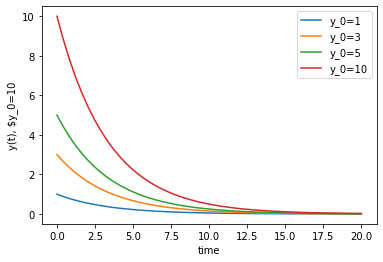

In [101]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t, k = 0.3):
    
    dydt = -k * y
    return dydt

# initial condition
ys = [1,3, 5, 10]

t = np.linspace(0,20)

for y0 in ys:
    # time points

    # solve ODE
    y = odeint(model,y0,t)

    # plot results
    plt.plot(t,y, label=f"y_0={y0}")
    plt.xlabel('time')
    plt.ylabel(f'y(t), $y_0={y0}')
    plt.legend()